## Assignment:11- Text Mining
## 1) Extract reviews of any product from ecommerce website like amazon
## 2) Perform emotion mining

In [1]:
## Importing Pandas & BeautifulSoup
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
## Putting the work into function
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\ammaurya\AppData\Local\Temp/ipykernel_6948/965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,5.0,Value for money product from OnePlus/Oppo,1. Handy and light weight2. Excellent voice cl...,13 July 2022
...,...,...,...,...
4995,5.0,BEST ACCEPTEBLE PRICE PHONE 📱,# Best phone on this price 🔥🔥🔥# Best screen qu...,1 March 2022
4996,5.0,Very nice product .,Very nice product . I am fully satisfied. All ...,8 April 2022
4997,5.0,Great mobile,Just the battery life should be made better,27 April 2022
4998,5.0,Nice product,Good,23 March 2022


In [10]:
df.to_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/Amazon_Review.csv")

In [15]:
## Importing Important Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...
[nlt

In [12]:
!pip install plotly

In [14]:
!pip install -U textblob

In [16]:
# load the dataset
reviews=pd.read_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/Amazon_Review.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,1.0,Worst phone ever,Hang problem,25 February 2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,5.0,Value for money product from OnePlus/Oppo,1. Handy and light weight2. Excellent voice cl...,13 July 2022
...,...,...,...,...
4995,5.0,BEST ACCEPTEBLE PRICE PHONE 📱,# Best phone on this price 🔥🔥🔥# Best screen qu...,1 March 2022
4996,5.0,Very nice product .,Very nice product . I am fully satisfied. All ...,8 April 2022
4997,5.0,Great mobile,Just the battery life should be made better,27 April 2022
4998,5.0,Nice product,Good,23 March 2022


In [17]:
## Exploring the data
reviews.Rating.describe()

count    5000.000000
mean        3.755400
std         1.501207
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [18]:
## No. of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Hang problem,2
1,I'm writing this review after using 3days !!!B...,65
2,Camera is so good n very fast phone back look ...,170
3,The media could not be loaded.\n ...,197
4,1. Handy and light weight2. Excellent voice cl...,87


In [19]:
## No. of Characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Hang problem,12.0
1,I'm writing this review after using 3days !!!B...,383.0
2,Camera is so good n very fast phone back look ...,882.0
3,The media could not be loaded.\n ...,963.0
4,1. Handy and light weight2. Excellent voice cl...,486.0


In [20]:
## Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Hang problem,5.500000
1,I'm writing this review after using 3days !!!B...,4.907692
2,Camera is so good n very fast phone back look ...,4.194118
3,The media could not be loaded.\n ...,4.181319
4,1. Handy and light weight2. Excellent voice cl...,4.597701


In [21]:
## No. of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,15
2,Camera is so good n very fast phone back look ...,51
3,The media could not be loaded.\n ...,59
4,1. Handy and light weight2. Excellent voice cl...,30


In [22]:
## No. of Special Characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,0
3,The media could not be loaded.\n ...,0
4,1. Handy and light weight2. Excellent voice cl...,0


In [23]:
## No. of Numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,1
3,The media could not be loaded.\n ...,6
4,1. Handy and light weight2. Excellent voice cl...,0


In [24]:
## No. of Uppercase Words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Hang problem,0
1,I'm writing this review after using 3days !!!B...,0
2,Camera is so good n very fast phone back look ...,2
3,The media could not be loaded.\n ...,13
4,1. Handy and light weight2. Excellent voice cl...,7


In [26]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [27]:
## Spelling Corrections
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                         Sang problem
1    I'm writing this review after using days !!!He...
2    Camera is so good n very fast phone back look ...
3    The media could not be loaded.\n              ...
4    1. Bandy and light weight. Excellent voice cla...
Name: Review, dtype: object

In [28]:
## Feature Engineering
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       25
1       26
2       25
3       28
4       13
        ..
4995     1
4996     8
4997    27
4998    23
4999     1
Name: Review_Date, Length: 5000, dtype: object 
 0       February
1       February
2       February
3       February
4           July
          ...   
4995       March
4996       April
4997       April
4998       March
4999       March
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [29]:
## Splitting the Review Date into separate columns(Year,Month,Day)
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,25,February,2022
1,26,February,2022
2,25,February,2022
3,28,February,2022
4,13,July,2022
...,...,...,...
4995,1,March,2022
4996,8,April,2022
4997,27,April,2022
4998,23,March,2022


In [30]:
df.Month.value_counts()

March       1310
April       1178
May          795
June         739
July         647
February     275
August        56
Name: Month, dtype: int64

In [32]:
## Changing month to numeric
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,2
1,2
2,2
3,2
4,7
...,...
4995,3
4996,4
4997,4
4998,3


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4716 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   int64  
 6   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [34]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4716 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   int64  
 5   Month        5000 non-null   int64  
 6   Year         5000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 273.6+ KB


In [35]:
## Dropping the original columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,25,2,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26,2,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25,2,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28,2,2022
4,5.0,Value for money product from OnePlus/Oppo,1. Handy and light weight2. Excellent voice cl...,13,7,2022


In [36]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,1.0,Worst phone ever,Hang problem,25 February 2022,25,February,2022
1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022,26,February,2022
2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022,25,February,2022
3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022,28,February,2022
4,5.0,Value for money product from OnePlus/Oppo,1. Handy and light weight2. Excellent voice cl...,13 July 2022,13,July,2022
...,...,...,...,...,...,...,...
4995,5.0,BEST ACCEPTEBLE PRICE PHONE 📱,# Best phone on this price 🔥🔥🔥# Best screen qu...,1 March 2022,1,March,2022
4996,5.0,Very nice product .,Very nice product . I am fully satisfied. All ...,8 April 2022,8,April,2022
4997,5.0,Great mobile,Just the battery life should be made better,27 April 2022,27,April,2022
4998,5.0,Nice product,Good,23 March 2022,23,March,2022


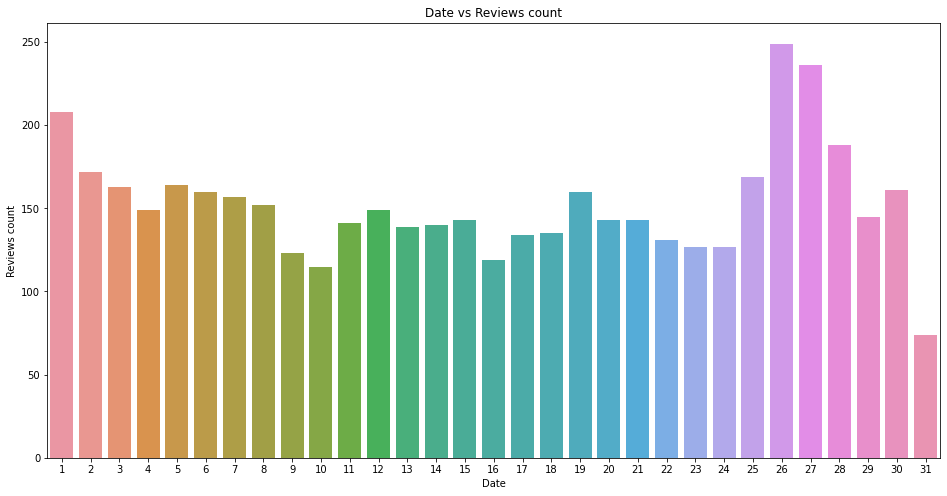

In [37]:
## Data Visualization

## Date vs Review Count

#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

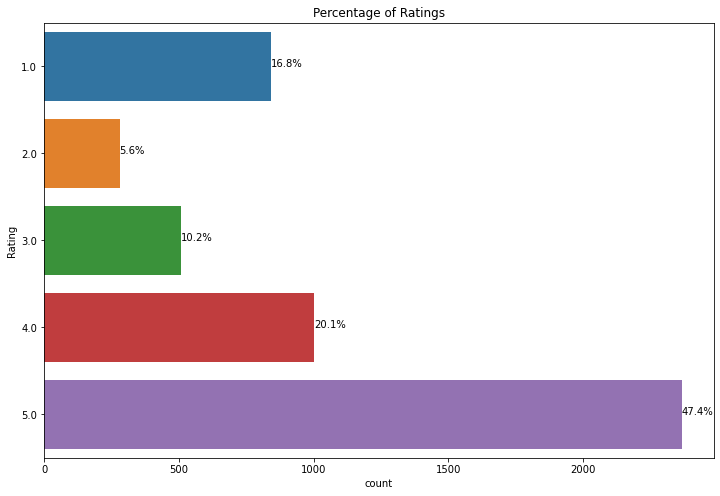

In [38]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

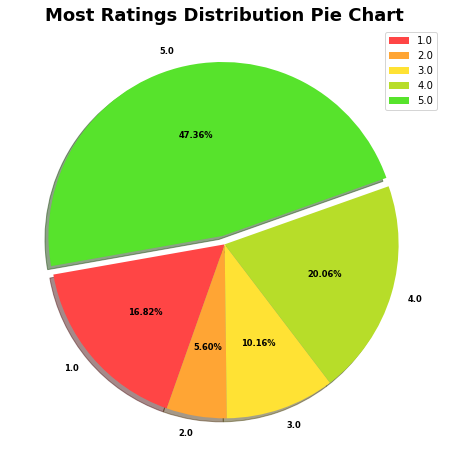

In [39]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

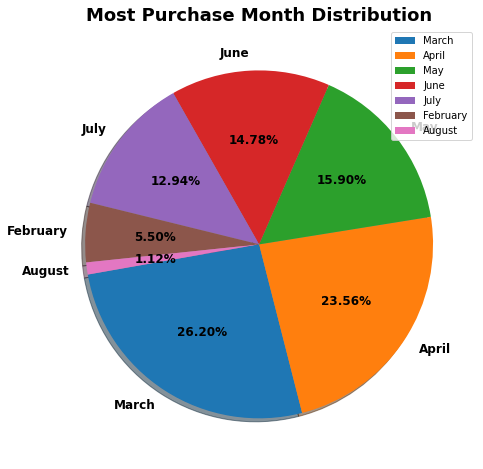

In [49]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [50]:
## Text Processing for Sentimental Analysis

data = df[['Review']]
data

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,1. Handy and light weight2. Excellent voice cl...
...,...
4995,# Best phone on this price 🔥🔥🔥# Best screen qu...
4996,Very nice product . I am fully satisfied. All ...
4997,Just the battery life should be made better
4998,Good


In [51]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [52]:
data

,Review
0,hang problem
1,i'm writing review using 3days !!!be honest no...
2,camera good n fast phone back look awesomewith...
3,the media could loaded. it’s a average product...
4,1. handy light weight2. excellent voice clarit...
...,...
4995,# best phone price 🔥🔥🔥# best screen quality ba...
4996,very nice product . i fully satisfied. all thi...
4997,just battery life made better
4998,good


In [53]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [54]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...


In [55]:
## Text Pre-Processing Techniques

## A. Pre-processing 'Key Words'
## a. Removing '@names'

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [56]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [57]:
## b: Removing links(https, http)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [58]:
## Removing reviews with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [59]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [60]:
## Resetting index because after removal of some rows, few index values might be missing

dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [61]:
## Removing Punctuations, Numbers & Special Characters

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [62]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [63]:
## Function to Remove Emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [64]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [65]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,hang problem,Hang problem,"[hang, problem]"
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,"[writing, review, using, day, honest, normal, ..."
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,"[camera, good, n, fast, phone, back, look, awe..."
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,"[medium, could, loaded, average, product, dece..."
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...,"[handy, light, weight, excellent, voice, clari..."
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...,"[got, delivery, feb, unboxed, phone, display, ..."
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...,"[medium, could, loaded, phone, fab, sometime, ..."
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...,"[nord, ce, decent, choice, someone, looking, u..."
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...,"[buy, phone, amazon, really, bad, exp, dislike..."
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...,"[phone, good, heating, problem, selfie, good, ..."


In [66]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [70]:
## Removing Stop Word

## With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, 
## because it needs to be used for key_phrases sentiment analysis

import codecs
with codecs.open(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/stop.txt", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])


a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [71]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [72]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,hang problem,Hang problem
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...
3,medium could loaded average product decent day...,The media could not be loaded.\n ...
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...
5,got delivery feb unboxed phone display damaged...,I got my delivery on 23 feb when I unboxed the...
6,medium could loaded phone fab sometime apps li...,The media could not be loaded.\n ...
7,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
8,buy phone amazon really bad exp dislike k poor...,****Don't buy any phones from Amazon*** i real...
9,phone good heating problem selfie good wise ph...,Phone is over all good but some heating proble...


In [73]:
## Tokenizing the Clean Reivews

TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['writing', 'review', 'using', 'day', 'honest', 'normal', 'android', 'phoneit', 'like', 'onepluscamera', 'quality', 'low', 'say', 'mp', 'notsound', 'also', 'lowbattery', 'backup', 'ok', 'one', 'day', 'normal', 'use', 'itsif', 'ur', 'gamer', 'go', 'itoverall', 'price', 'high', 'handsetif', 'u', 'really', 'wan', 'na', 'buy', 'oneplus', 'ho', 'higher', 'end', 'modeli', 'first', 'time', 'buying', 'onepluslittle', 'disappointment'])

In [74]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                                      [hang, problem]
1    [writing, review, using, day, honest, normal, ...
2    [camera, good, n, fast, phone, back, look, awe...
3    [medium, could, loaded, average, product, dece...
4    [handy, light, weight, excellent, voice, clari...
5    [got, delivery, feb, unboxed, phone, display, ...
6    [medium, could, loaded, phone, fab, sometime, ...
7    [nord, ce, decent, choice, someone, looking, u...
8    [buy, phone, amazon, really, bad, exp, dislike...
9    [phone, good, heating, problem, selfie, good, ...
Name: Clean_Reviews, dtype: object

In [75]:
## Converting words to stemmer

from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [76]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,hang problem
1,write review use day honest normal android pho...
2,camera good n fast phone back look awesomewith...
3,medium could load averag product decent day da...
4,handi light weight excel voic clariti signal r...
...,...
4941,best phone price best screen qualiti baki ka b...
4942,nice product fulli satisfi thing good
4943,batteri life made better
4944,good


In [77]:
## Converting Words to Lemma

word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ammaurya\AppData\Roaming\nltk_data...


,stemmed
0,hang problem
1,writing review using day honest normal android...
2,camera good n fast phone back look awesomewith...
3,medium could loaded average product decent day...
4,handy light weight excellent voice clarity sig...
...,...
4941,best phone price best screen quality baki ka b...
4942,nice product fully satisfied thing good
4943,battery life made better
4944,good


In [78]:
## Basic Feature Extraction

## Applying bag of words without N-grams

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [79]:
 ## printing (cv.vocabulary_)
    
print(cv.get_feature_names()[109:200])

['alignment', 'allover', 'allow', 'allram', 'allready', 'allrounder', 'almost', 'along', 'alot', 'alothighly', 'alphabet', 'already', 'alright', 'also', 'alsooverall', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'aluminium', 'always', 'amaaaazziingg', 'amajan', 'amaze', 'amazed', 'amazing', 'amazingeverything', 'amazingly', 'amazoing', 'amazon', 'amazonall', 'amazoncoming', 'amazone', 'amazonthey', 'ambient', 'ambition', 'amd', 'amej', 'amezing', 'amezon', 'ammount', 'amo', 'amoled', 'among', 'amonth', 'amotions', 'amount', 'amountdon', 'amountone', 'amozn', 'ample', 'analysis', 'andar', 'ande', 'ander', 'andorid', 'andriod', 'android', 'androidneed', 'angel', 'angle', 'angry', 'animation', 'annonce', 'announce', 'announced', 'announcement', 'announces', 'annoyed', 'annoying', 'another', 'answer', 'answered', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywhere', 'aod', 'aor', 'aosp', 'ap', 'apan', 'apart', 'aperture', 'a

C:\Users\ammaurya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
print(cv.get_feature_names()[:100])

['aa', 'aaa', 'aacha', 'aaj', 'aam', 'aap', 'aapko', 'aawaj', 'aaya', 'aayega', 'aayi', 'ab', 'abhi', 'abides', 'able', 'abnormal', 'abou', 'absent', 'absolute', 'absolutely', 'absurd', 'abt', 'accept', 'acceptable', 'accepted', 'accepting', 'accesories', 'access', 'accessing', 'accessory', 'accha', 'accilent', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'accpet', 'accuracy', 'accurate', 'acha', 'achcha', 'achche', 'achha', 'achieved', 'across', 'act', 'action', 'activation', 'active', 'activity', 'actual', 'actually', 'ad', 'adapter', 'adaption', 'adaptor', 'add', 'added', 'addicted', 'adding', 'additional', 'additionally', 'address', 'adequate', 'adjustment', 'admit', 'adopted', 'adore', 'advance', 'advanced', 'advancement', 'advantage', 'advertisement', 'advice', 'advisor', 'aeroplane', 'aesthetic', 'af', 'affect', 'affected', 'afford', 'affordable', 'afterwards', 'agai', 'agar', 'agent', 'ager', 'aggregation', 'ago', 'agoscreen', 'agree', 'agreed', 

In [81]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [82]:
## Counting Vectorizer with N-Grams(Bigrams, Trigrams)

from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4946 [00:00<?, ?it/s]

In [83]:
corpus[3]

'medium could load averag product decent day day activ one thing would like mention exchang far far alot good amazon like minut deliveri agent good although scratch neglect minor scratch exchang poco pro gb variant exchang rupe bought half year ago sold good price plu point amazoncom back devic would say ok devic camera averag perform fine one plu lose origin oxygen color warp charger vooc charger ye taken oppo wish way believ one plu chang one plu fan want merg brand pleas keep origin maintain thanx amazon hasselfre exchang alot better flipkart'

In [84]:
## Applying Countvectorizer

# Creating the Bag of Words model

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [85]:
X.shape

(4946, 5000)

In [86]:
cv.get_feature_names()[:20]

['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'abt',
 'abt neg',
 'abt neg review',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt']

In [87]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [88]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aa,aap,ab,abl,absolut,abt,abt neg,abt neg review,accept,access,...,year old,year secur,year secur updat,yellow,yet,youtub,youtub review,youtub video,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
## Running TF-IDF-Vectorizer

from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4946 [00:00<?, ?it/s]

In [90]:
corpus[4]

'handi light weight excel voic clariti signal recept good compar op rt op r easi use one hand abl take call team googl meet slack without issu heat issu charg speed awesom price rang wifi call good tri jio batteri backup superb easili cross day sot solid hr camera one drawback phone averag'

In [91]:
## TFidf Vectorizer

tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [92]:
X.shape

(4946, 5000)

In [93]:
tfidf_v.get_feature_names()[:20]

C:\Users\ammaurya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'abt',
 'abt neg',
 'abt neg review',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt']

In [94]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [95]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aa,aap,ab,abl,absolut,abt,abt neg,abt neg review,accept,access,...,year old,year secur,year secur updat,yellow,yet,youtub,youtub review,youtub video,yr,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.121877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4942,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4943,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4944,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
## Named Entity Recognition Function

reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'hang problem writing review using day honest normal android phoneit like onepluscamera quality low say mp notsound also lowbattery backup ok one day normal use itsif ur gamer go itoverall price high handsetif u really wanna buy oneplus ho higher end modeli first time buying onepluslittle disappointment camera good n fast phone back look awesomewith dis price segment worth n important thing phone dedicated memory card slot think dis first one plus phone dedicated slot memory cardbattery backup also good n wit help w charger u charge ur phone frm minsit super vooc charger frm dat u charge ur phone fastvery smooth touch n fast phone u play game laginternet connectivity also fast n lightning wit jio sim u c hav pasted one photo showing downloading speed mbps wit cellular networki think everyone want buy dis phone go iti think oneplus launched dis phone lot good feature n important thing price lessi recommendjust go itthank u oneplus n amazon dis wonderful product medium could loaded avera

In [97]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [98]:
for token in doc_block[:50]:
    print(token,token.pos_)  

hang VERB
problem NOUN
writing VERB
review NOUN
using VERB
day NOUN
honest ADJ
normal ADJ
android NOUN
phoneit ADJ
like ADP
onepluscamera NOUN
quality NOUN
low ADV
say VERB
mp NOUN
notsound NOUN
also ADV
lowbattery ADJ
backup NOUN
ok INTJ
one NUM
day NOUN
normal ADJ
use NOUN
itsif VERB
ur PROPN
gamer NOUN
go VERB
itoverall PROPN
price NOUN
high ADJ
handsetif PROPN
u PROPN
really ADV
wanna PROPN
buy VERB
oneplus PROPN
ho PROPN
higher ADJ
end NOUN
modeli PROPN
first ADJ
time NOUN
buying VERB
onepluslittle NOUN
disappointment NOUN
camera NOUN
good PROPN
n CCONJ


In [99]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rupee', 'bought', 'year', 'sold', 'price', 'point', 'amazoncoming', 'device', 'say', 'device', 'camera', 'performance', 'losing', 'originality', 'oxygen', 'color', 'warp', 'charger', 'taken', 'wish', 'way', 'believed', 'change', 'fan', 'want', 'merge', 'brand', 'keep', 'originality', 'maintained', 'exchange', 'alot', 'light', 'weight', 'voice', 'clarity', 'signal', 'reception', 'compared', 'op', 'rt', 'op', 'r', 'use', 'hand', 'take', 'call', 'team', 'meet', 'slack', 'issue', 'heating', 'issue', 'charging', 'speed', 'price', 'range', 'wifi', 'calling', 'tried', 'battery', 'backup', 'superb', 'crossing', 'day', 'sot', 'hr', 'camera', 'drawback', 'phone', 'average', 'got', 'delivery', 'phone', 'display', 'damaged', 'replacement', 'phone', 'technician', 'suppose', 'come', 'inspection', 'visit', 'talked', 'call', 'asked', 'install', 'application', 'saw', 'damage', 'display', 'screen', 'let', 'hope', 'replace', 'phone', 'update', 'rest', 'amazon', 'consider']


In [100]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,2120
1,camera,1430
2,battery,1051
3,quality,869
4,product,449
5,charging,406
6,oneplus,372
7,price,369
8,day,357
9,issue,306


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

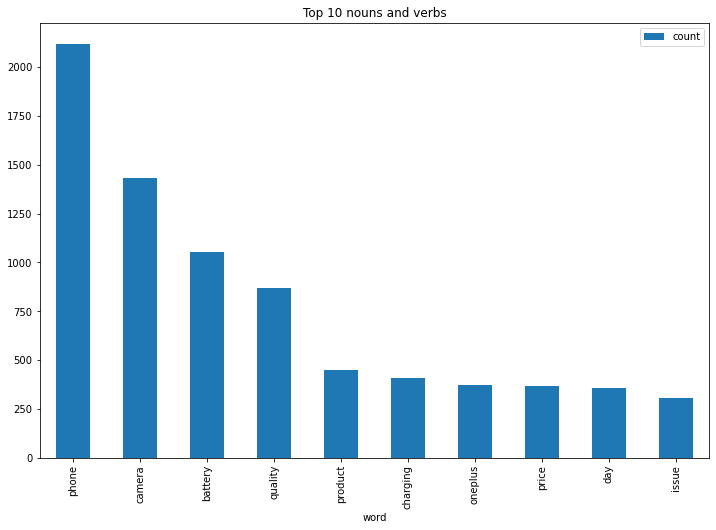

In [101]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [104]:
## Feature Extraction

## Converting Textual representation in the form of numeric features

## Feature Extraction of Key-Words

# Visualizing results (Barchart for top 10 nouns + verbs)
# BOW features

bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')

# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [105]:
## Fetching the Sentiments from theTweet

# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [106]:
## Using NLTK's SentimentIntensityAnalyzer

sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,4221
neg,725


In [107]:
dataframe.Clean_Reviews[8]

'buy phone amazon really bad exp dislike k poor build quality configuration real etc coming le k brand buy k audio worst single speaker volume low call end think phone mic issue back camera good phone touch also felt bit lack like fast charging within min charge front cam bit okay battery backup good g band support dual g standby oneplus promise something back camera quality audio improvement update buy offer otherwise go real gt master pro pro plus moto mobile also good using moto year good camera sound took two drawback phone rest okay manageble return policy replacement'

In [108]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.147, 'neu': 0.613, 'pos': 0.24, 'compound': 0.8148}

In [112]:
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.147, 'neu': 0.613, 'pos': 0.24, 'compound': 0.8148}

In [113]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou..."
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co..."
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp..."
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co..."
4,handy light weight excellent voice clarity sig...,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp..."


In [114]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729
4,handy light weight excellent voice clarity sig...,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp...",0.9826


In [115]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,hang problem,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",-0.4019,Negative
1,writing review using day honest normal android...,"{'neg': 0.103, 'neu': 0.744, 'pos': 0.153, 'co...",0.3818,Positive
2,camera good n fast phone back look awesomewith...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.9854,Positive
3,medium could loaded average product decent day...,"{'neg': 0.051, 'neu': 0.648, 'pos': 0.301, 'co...",0.9729,Positive
4,handy light weight excellent voice clarity sig...,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp...",0.9826,Positive
...,...,...,...,...
4941,best phone price best screen quality baki ka b...,"{'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'comp...",0.8555,Positive
4942,nice product fully satisfied thing good,"{'neg': 0.0, 'neu': 0.249, 'pos': 0.751, 'comp...",0.8425,Positive
4943,battery life made better,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Positive
4944,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive


In [117]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'Green')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

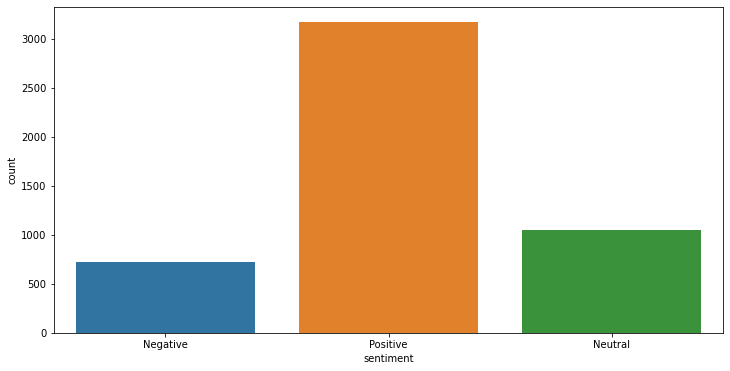

In [133]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\ammaurya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

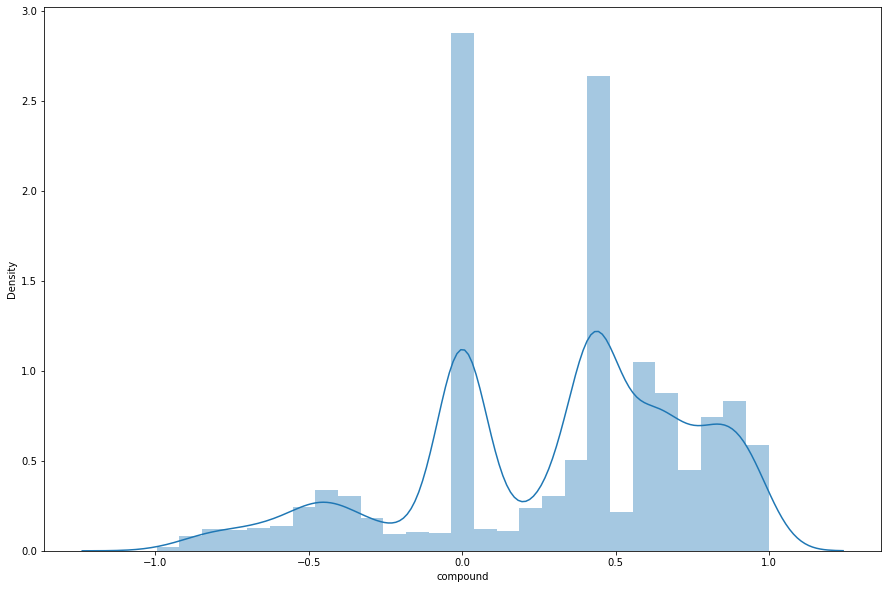

In [134]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [137]:
## Using Textblob

sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,4351
neg,595


In [138]:
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,hang problem,Hang problem,0.000000,0.000000
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,0.497333,0.166000
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,0.573333,0.358889
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,0.509524,0.240476
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...,0.715972,0.551389


Text(0, 0.5, 'Subjectivity')

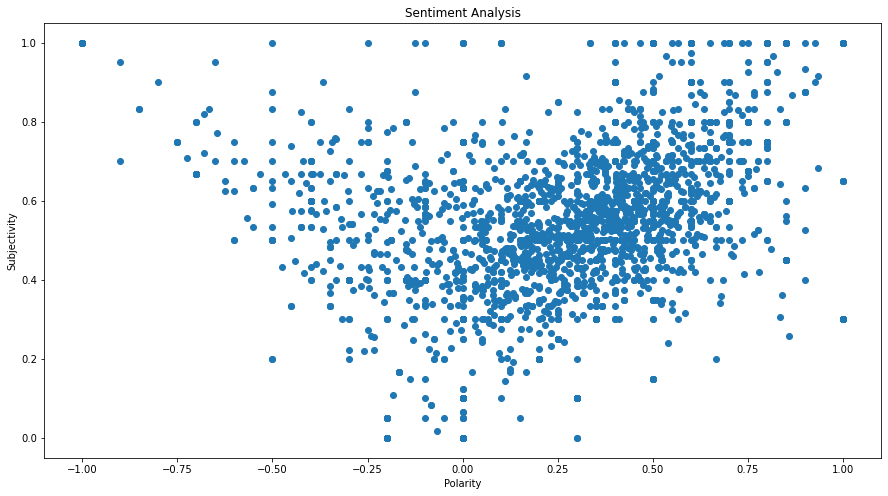

In [139]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [140]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [143]:
## NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\11-Text Mining/Amazon_Review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,hang problem,Hang problem,0.000000,0.000000,neg
1,writing review using day honest normal android...,I'm writing this review after using 3days !!!B...,0.497333,0.166000,pos
2,camera good n fast phone back look awesomewith...,Camera is so good n very fast phone back look ...,0.573333,0.358889,pos
3,medium could loaded average product decent day...,The media could not be loaded.\n ...,0.509524,0.240476,pos
4,handy light weight excellent voice clarity sig...,1. Handy and light weight2. Excellent voice cl...,0.715972,0.551389,pos


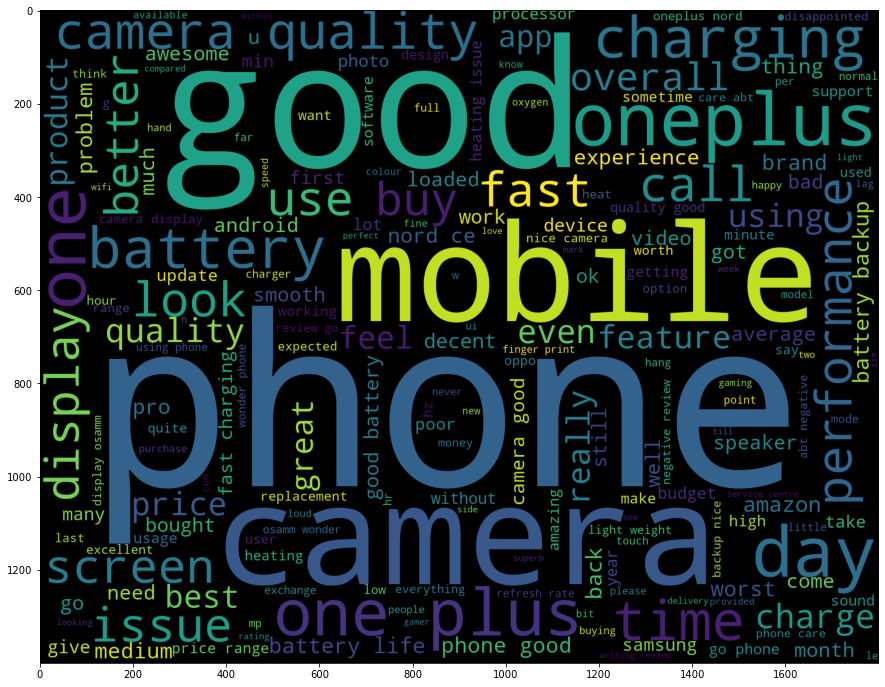

In [144]:
## Story Generation

allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [145]:
## Most common words in Positive Review

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

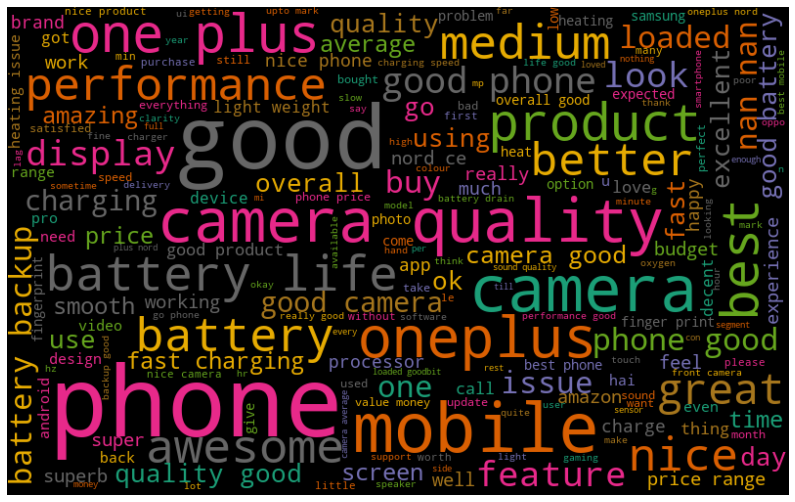

In [146]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

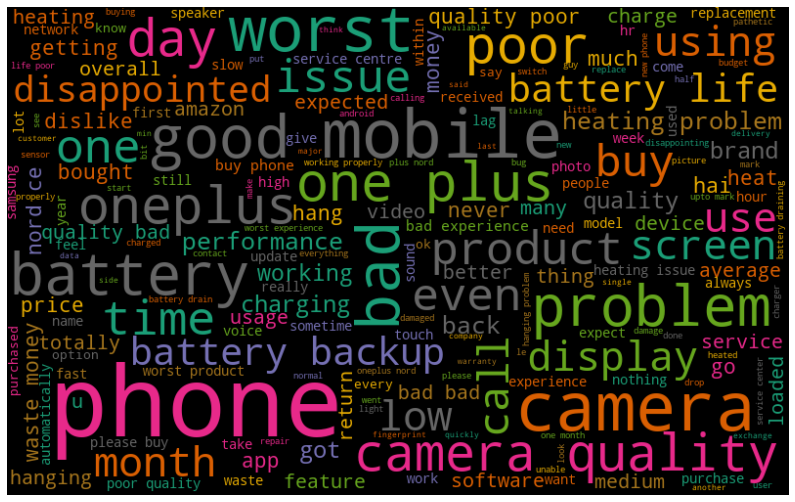

In [147]:
## Most common words in Negative review

all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

In [ ]:
####-------------------------------------###